In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_csv("/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt",engine="python",
sep=":::", names=["id","name","genre","summary"])
train_data.head()

,id,name,genre,summary
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [3]:
test_data=pd.read_csv("/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt",engine="python",
sep=":::", names=["id","name","genre","summary"])
test_data.head()

,id,name,genre,summary
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       54214 non-null  int64 
 1   name     54214 non-null  object
 2   genre    54214 non-null  object
 3   summary  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [5]:
train_data.duplicated().sum()

0

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       54200 non-null  int64 
 1   name     54200 non-null  object
 2   genre    54200 non-null  object
 3   summary  54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


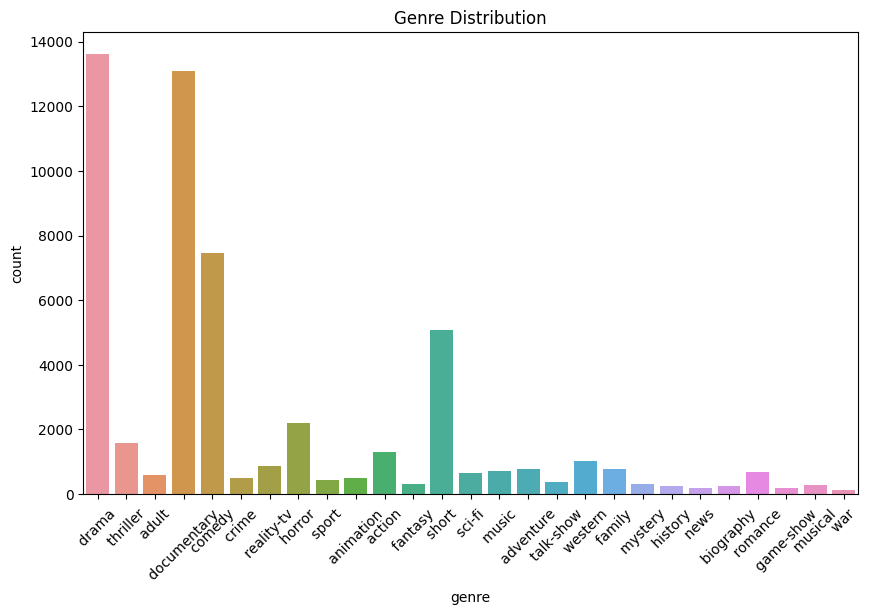

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='genre')
plt.xticks(rotation=45)
plt.title('Genre Distribution')
plt.show()

In [8]:
x_train=train_data['summary']
y_train=train_data['genre']
x_test=test_data['summary']
y_test=test_data['genre']

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
x_train1 = v.fit_transform(x_train)
x_test1 =  v.transform(x_test)

In [10]:
df= train_data['genre'].tolist()
genres=set(df)
genres

{' action ',
 ' adult ',
 ' adventure ',
 ' animation ',
 ' biography ',
 ' comedy ',
 ' crime ',
 ' documentary ',
 ' drama ',
 ' family ',
 ' fantasy ',
 ' game-show ',
 ' history ',
 ' horror ',
 ' music ',
 ' musical ',
 ' mystery ',
 ' news ',
 ' reality-tv ',
 ' romance ',
 ' sci-fi ',
 ' short ',
 ' sport ',
 ' talk-show ',
 ' thriller ',
 ' war ',
 ' western '}

Model Score on Training data 0.614158704393699
Model Score on Testing data 0.5218450184501845


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.04      0.64      0.07        74
       adult        0.01      0.36      0.01        11
   adventure        0.03      0.52      0.06        44
   animation        0.00      0.00      0.00         0
   biography        0.00      0.00      0.00        28
      comedy        0.47      0.53      0.49      6573
       crime        0.00      0.00      0.00         1
 documentary        0.90      0.56      0.69     21119
       drama        0.81      0.46      0.59     23723
      family        0.00      0.29      0.01         7
     fantasy        0.00      0.00      0.00        21
   game-show        0.02      1.00      0.03         3
     history        0.00      0.00      0.00         0
      horror        0.28      0.74      0.41       852
       music        0.07      0.84      0.13        63
     musical        0.00      0.00      0.00         0
     mystery        0.00      0.00      0.00         0
        n

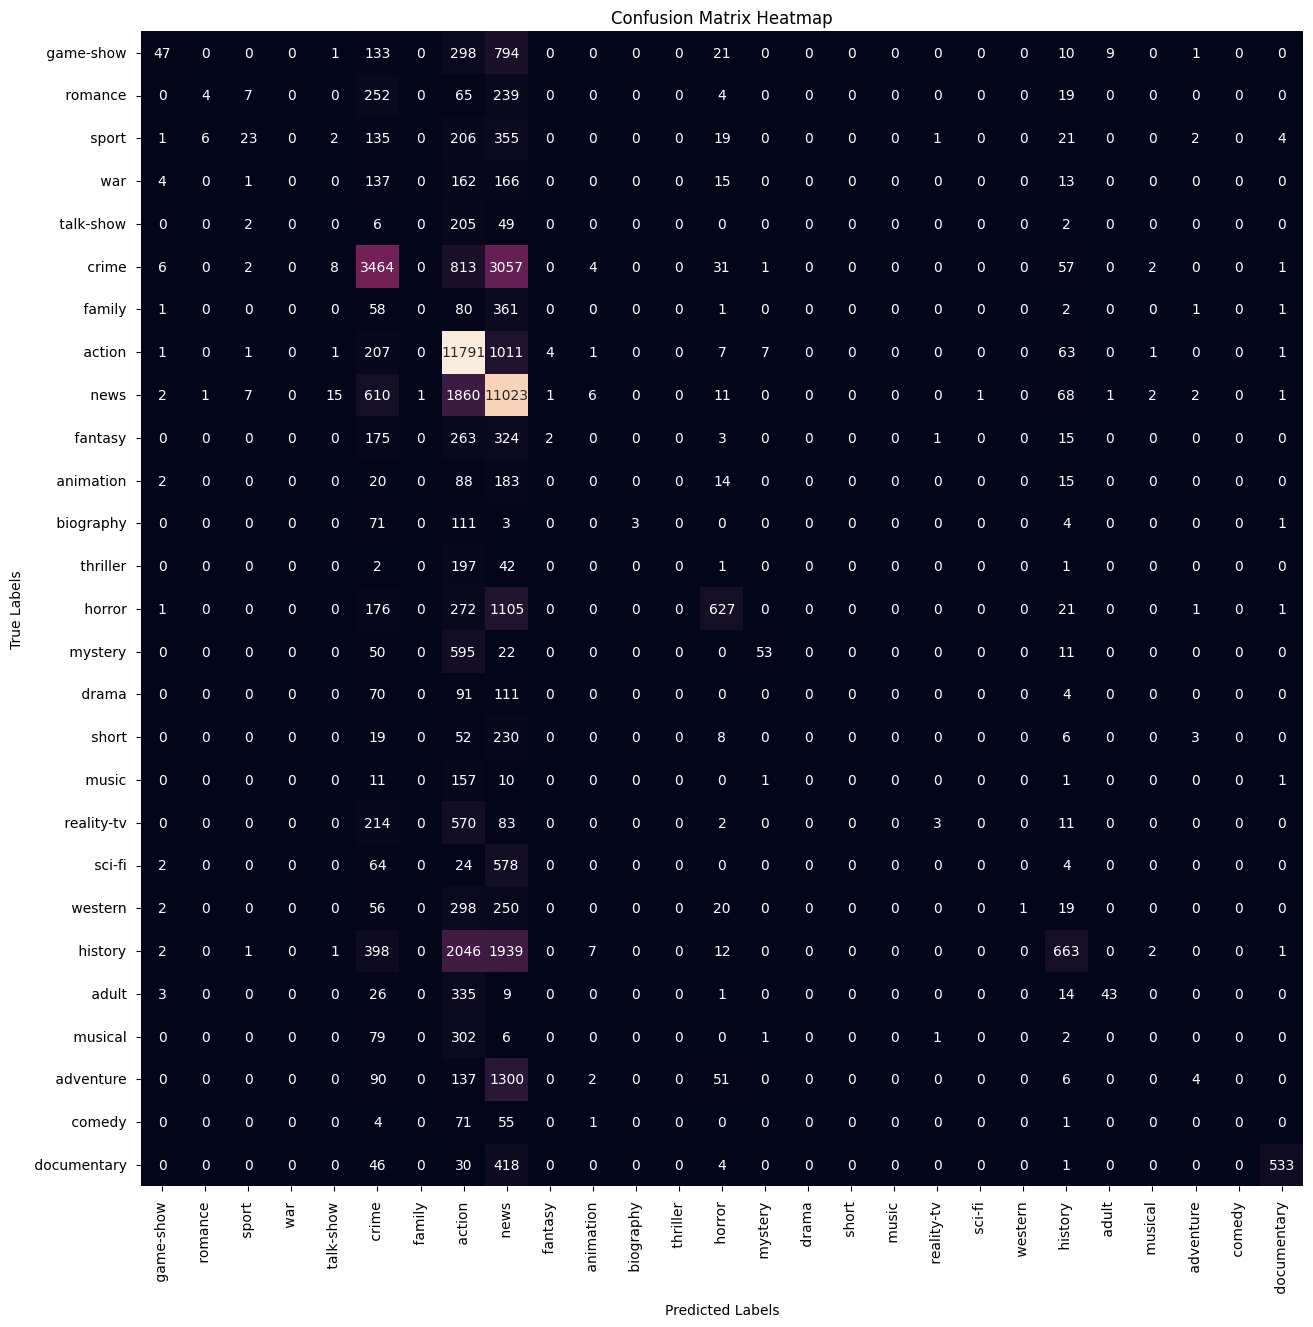

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
mnb= MultinomialNB()
mnb.fit(x_train1 ,y_train)
print("Model Score on Training data",mnb.score(x_train1 ,y_train))
print("Model Score on Testing data",mnb.score(x_test1 ,y_test))
y_pred = mnb.predict(x_test1)

print(classification_report(y_pred ,y_test))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=genres, yticklabels=genres)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Score on Training data 0.7316006935477921
Model Score on Testing data 0.5808118081180812
               precision    recall  f1-score   support

      action        0.38      0.41      0.39      1222
       adult        0.40      0.52      0.45       459
   adventure        0.24      0.41      0.30       452
   animation        0.17      0.33      0.22       255
   biography        0.02      0.07      0.03        69
      comedy        0.58      0.55      0.57      7849
       crime        0.11      0.21      0.15       272
 documentary        0.80      0.72      0.75     14565
       drama        0.70      0.59      0.64     16265
      family        0.19      0.28      0.23       514
     fantasy        0.11      0.30      0.16       122
   game-show        0.62      0.67      0.64       177
     history        0.03      0.07      0.04        95
      horror        0.61      0.61      0.61      2220
       music        0.53      0.60      0.56       647
     musical        0.11

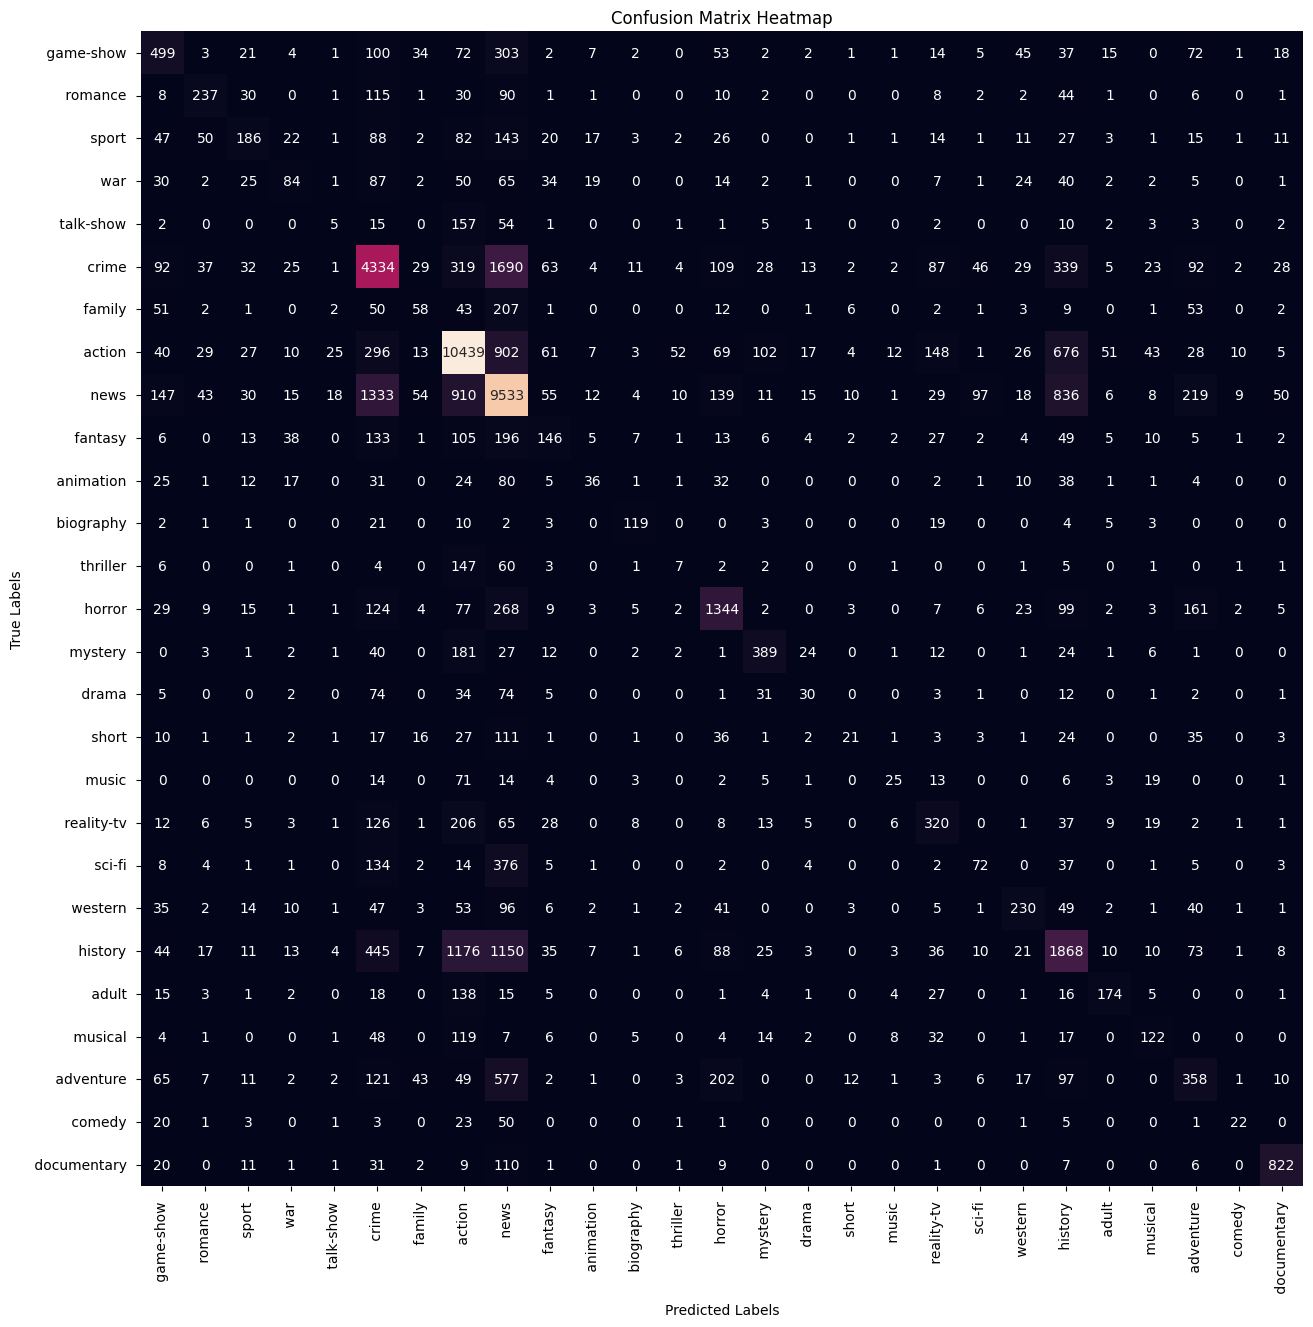

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train1 ,y_train)
print("Model Score on Training data",lr.score(x_train1 ,y_train))
print("Model Score on Testing data",lr.score(x_test1 ,y_test))
y_pred = lr.predict(x_test1)
print(classification_report(y_pred ,y_test))


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=genres, yticklabels=genres)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Score on Training data 0.999483528239938
Model Score on Testing data 0.516180811808118
               precision    recall  f1-score   support

      action        0.31      0.32      0.32      1259
       adult        0.40      0.52      0.45       460
   adventure        0.21      0.29      0.25       565
   animation        0.13      0.22      0.17       303
   biography        0.01      0.02      0.01       177
      comedy        0.52      0.50      0.51      7820
       crime        0.11      0.15      0.13       361
 documentary        0.72      0.69      0.71     13645
       drama        0.59      0.55      0.57     14804
      family        0.15      0.20      0.17       582
     fantasy        0.11      0.15      0.13       222
   game-show        0.63      0.74      0.68       164
     history        0.02      0.05      0.03       109
      horror        0.55      0.55      0.55      2212
       music        0.49      0.55      0.51       650
     musical        0.11  

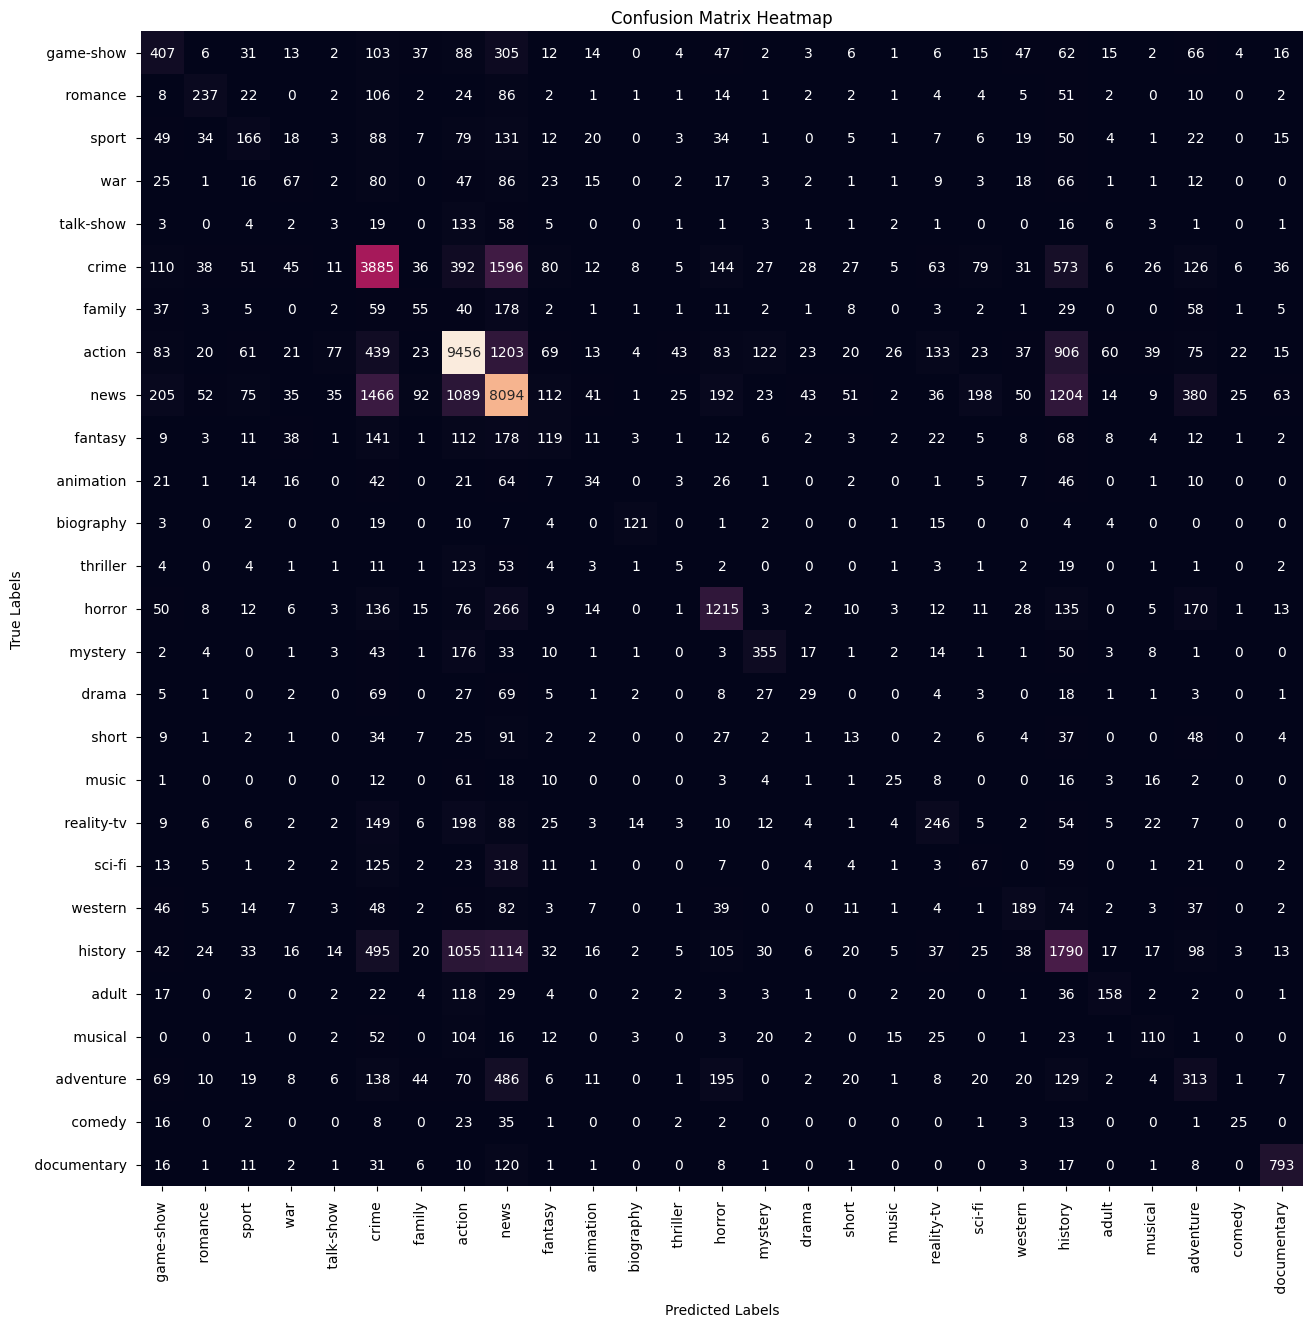

In [13]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(x_train1 ,y_train)
print("Model Score on Training data",svm.score(x_train1 ,y_train))
print("Model Score on Testing data",svm.score(x_test1 ,y_test))
y_pred = svm.predict(x_test1)
print(classification_report(y_pred ,y_test))




cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=genres, yticklabels=genres)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x_train2 = vectorizer.fit_transform(x_train)
x_test2 =  vectorizer.transform(x_test)

Model Score on Training data 0.4616704172354005
Model Score on Training data 0.4426752767527675


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00         0
       adult        0.00      0.00      0.00         0
   adventure        0.00      0.00      0.00         0
   animation        0.00      0.00      0.00         0
   biography        0.00      0.00      0.00         0
      comedy        0.03      0.65      0.06       332
       crime        0.00      0.00      0.00         0
 documentary        0.90      0.53      0.67     21975
       drama        0.88      0.38      0.53     31875
      family        0.00      0.00      0.00         0
     fantasy        0.00      0.00      0.00         0
   game-show        0.00      0.00      0.00         0
     history        0.00      0.00      0.00         0
      horror        0.00      0.00      0.00         0
       music        0.00      0.00      0.00         0
     musical        0.00      0.00      0.00         0
     mystery        0.00      0.00      0.00         0
        n

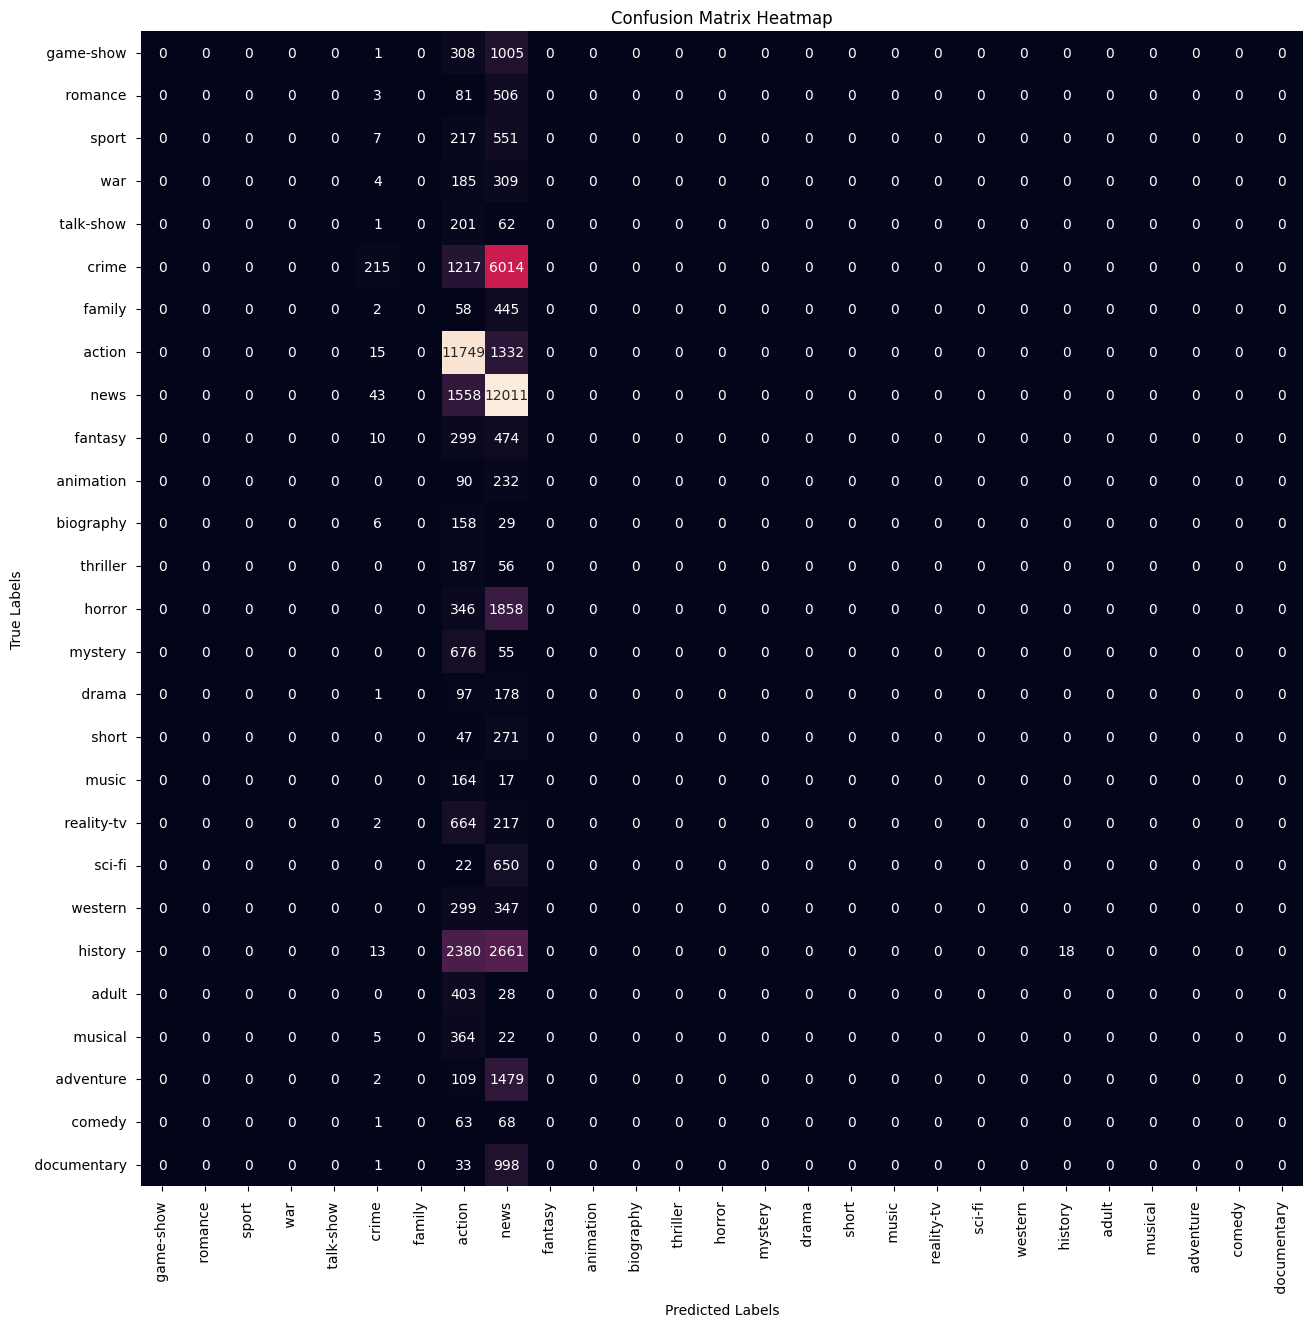

In [15]:
mnb= MultinomialNB()
mnb.fit(x_train2 ,y_train)
print("Model Score on Training data",mnb.score(x_train2 ,y_train))
print("Model Score on Training data",mnb.score(x_test2 ,y_test))
y_pred = mnb.predict(x_test2)

print(classification_report(y_pred ,y_test))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=genres, yticklabels=genres)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Score on Training data 0.7042276902645074
Model Score on Training data 0.5944464944649447


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.30      0.50      0.37       777
       adult        0.24      0.63      0.34       219
   adventure        0.17      0.71      0.28       189
   animation        0.02      0.62      0.03        13
   biography        0.00      0.00      0.00         0
      comedy        0.58      0.56      0.57      7709
       crime        0.02      0.37      0.04        30
 documentary        0.88      0.66      0.76     17281
       drama        0.80      0.54      0.65     19933
      family        0.08      0.48      0.14       130
     fantasy        0.01      0.67      0.01         3
   game-show        0.51      0.90      0.65       109
     history        0.00      0.00      0.00         0
      horror        0.57      0.66      0.61      1913
       music        0.42      0.69      0.52       446
     musical        0.01      1.00      0.01         2
     mystery        0.00      0.00      0.00         0
        n

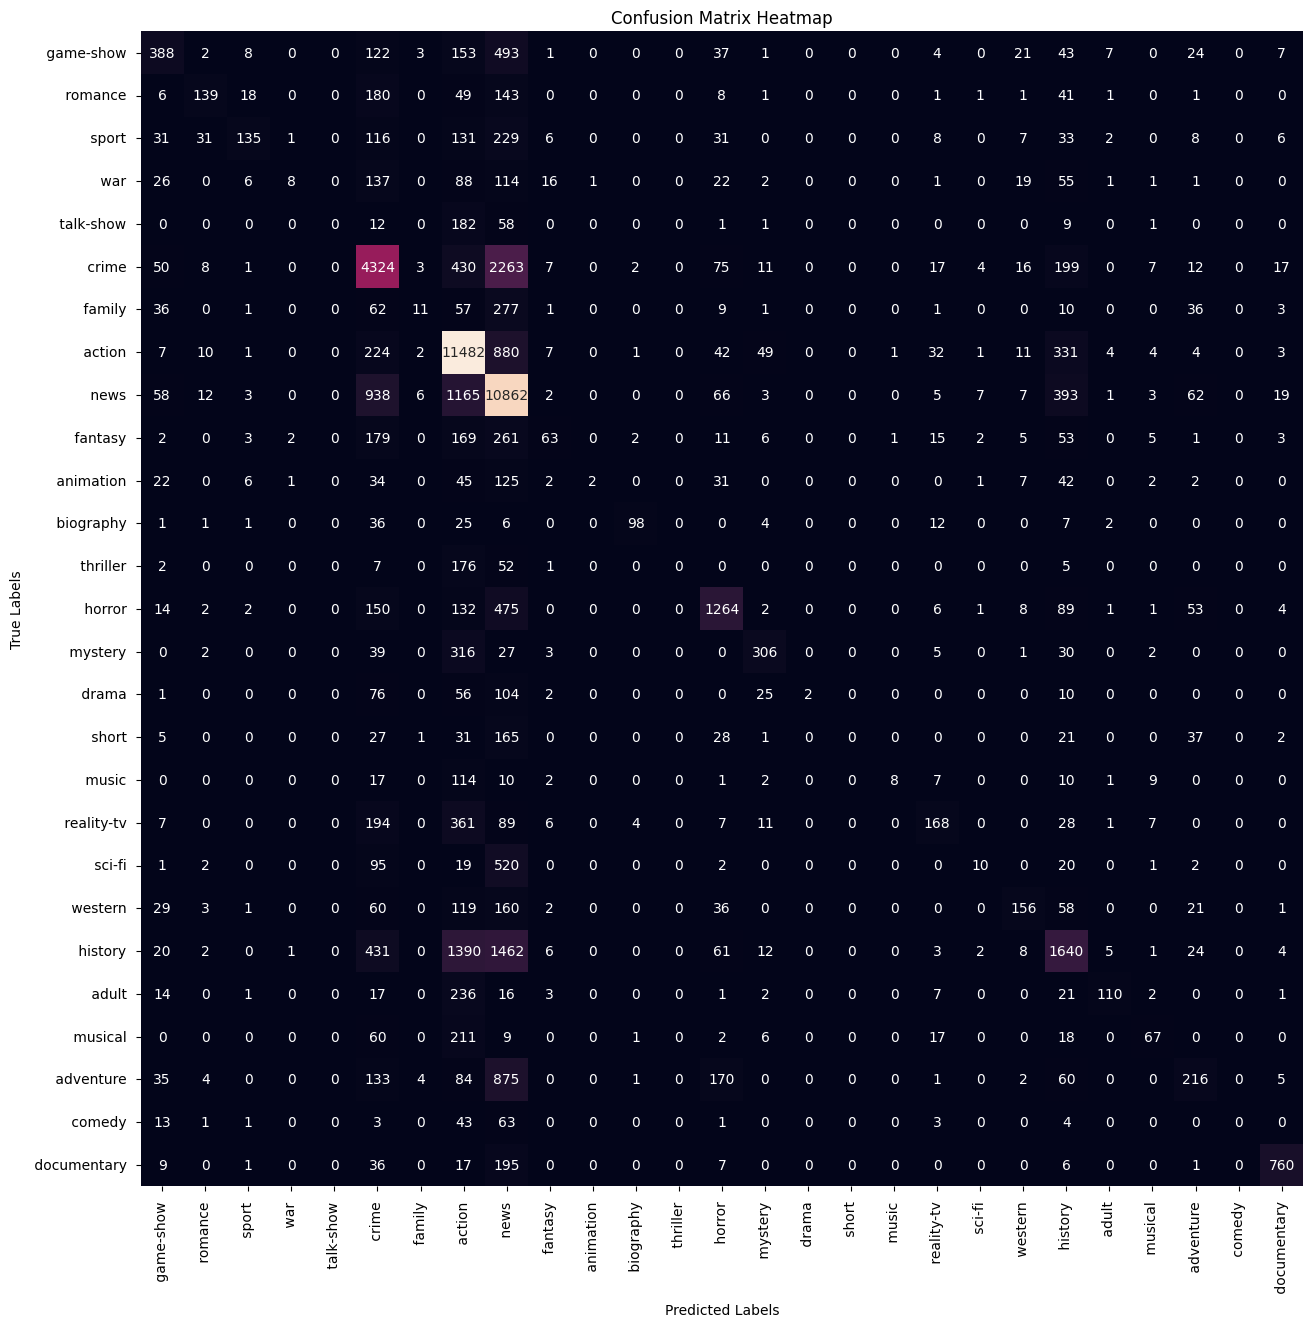

In [16]:
lr = LogisticRegression()
lr.fit(x_train2 ,y_train)
print("Model Score on Training data",lr.score(x_train2 ,y_train))
print("Model Score on Training data",lr.score(x_test2 ,y_test))
y_pred = lr.predict(x_test2)
print(classification_report(y_pred ,y_test))


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=genres, yticklabels=genres)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

Model Score on Training data 0.9698601837163833
Model Score on Training data 0.5945018450184502
               precision    recall  f1-score   support

      action        0.35      0.43      0.38      1053
       adult        0.43      0.65      0.52       389
   adventure        0.22      0.52      0.31       331
   animation        0.12      0.38      0.18       158
   biography        0.00      0.00      0.00         9
      comedy        0.60      0.56      0.58      8023
       crime        0.06      0.28      0.10       107
 documentary        0.84      0.70      0.76     15741
       drama        0.73      0.57      0.64     17371
      family        0.14      0.37      0.21       302
     fantasy        0.09      0.32      0.14        90
   game-show        0.63      0.81      0.71       150
     history        0.02      0.26      0.04        19
      horror        0.63      0.61      0.62      2271
       music        0.54      0.62      0.58       632
     musical        0.0

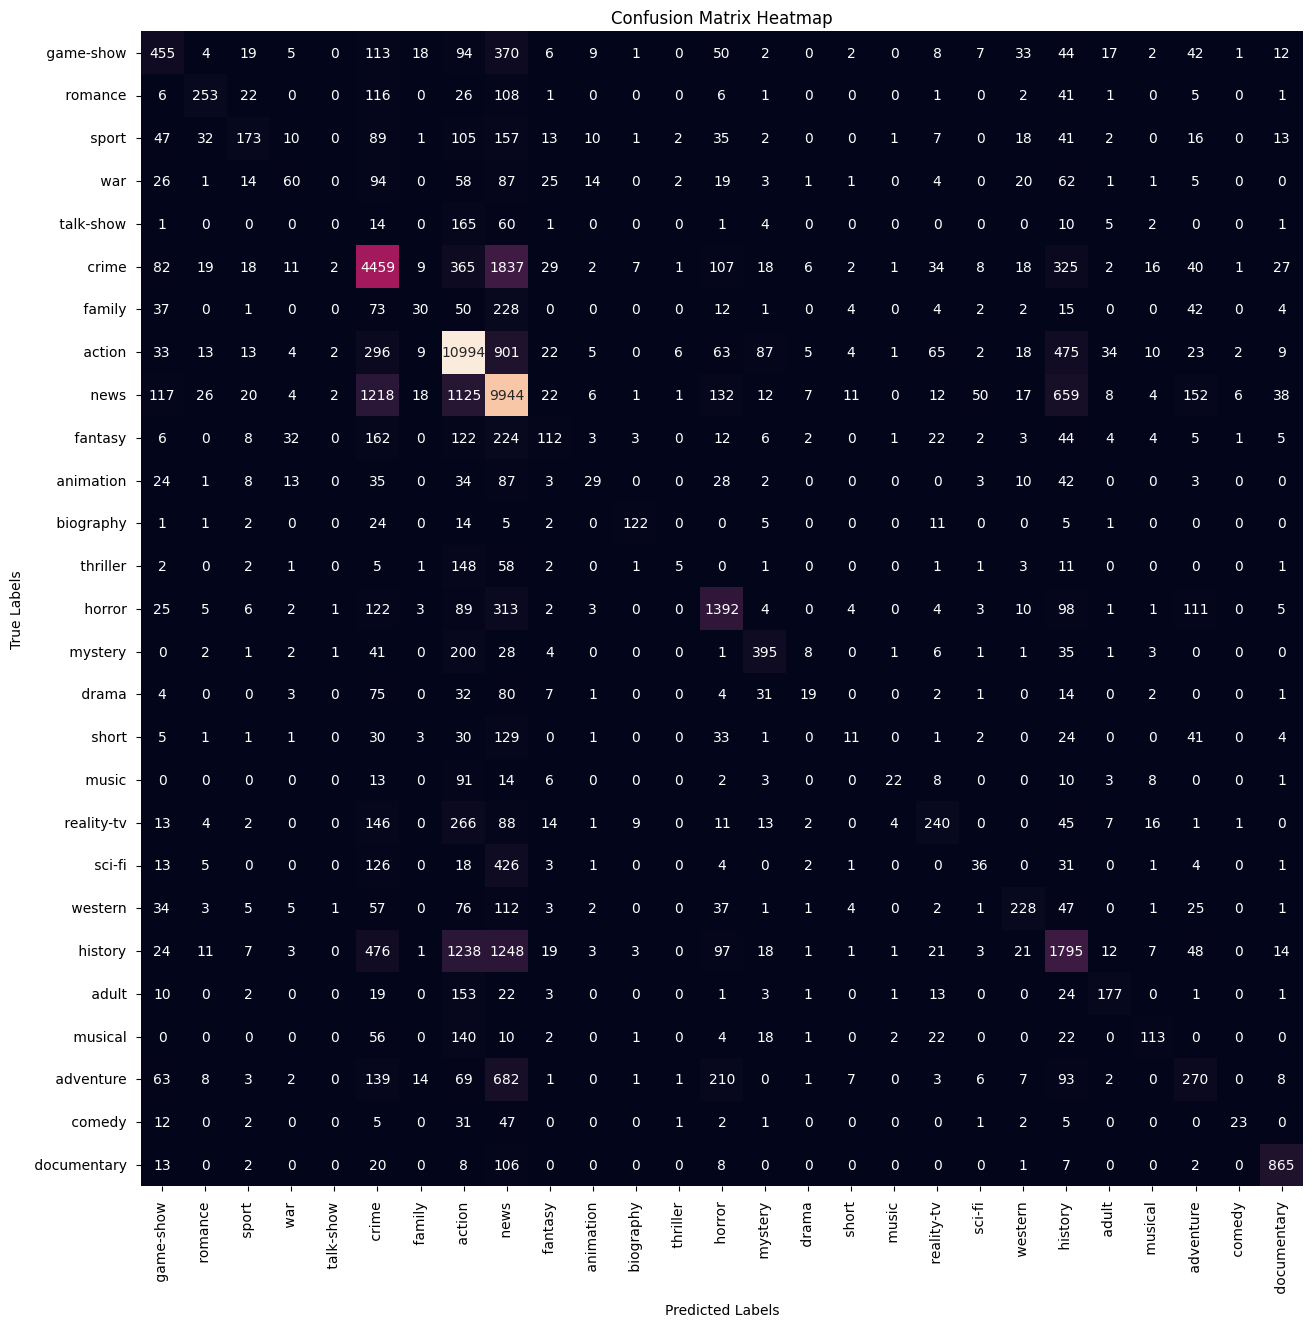

In [17]:
svm = LinearSVC()
svm.fit(x_train2 ,y_train)
print("Model Score on Training data",svm.score(x_train2 ,y_train))
print("Model Score on Training data",svm.score(x_test2 ,y_test))
y_pred = svm.predict(x_test2)
print(classification_report(y_pred ,y_test))




cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=genres, yticklabels=genres)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()